# Reconnaissance de chiffres manuscrits : MNIST

In [1]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

On charge le dataset MNIST :

In [2]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


Chaque image est une matrice de pixels :

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


que l'on peut afficher comme une image :

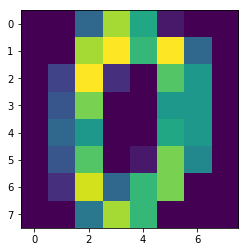

In [4]:
plt.imshow(digits.images[0])

en niveaux de gris, sans graduation des axes, et avec le label comme titre :

Text(0.5,1,'Label: 0')

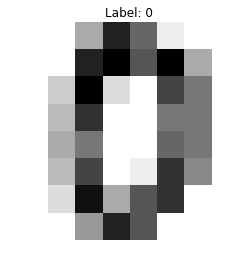

In [5]:
plt.imshow(digits.images[0], cmap="gray_r")
plt.axis('off')
plt.title('Label: %i' % digits.target[0])

On affiche les 50 premiers :

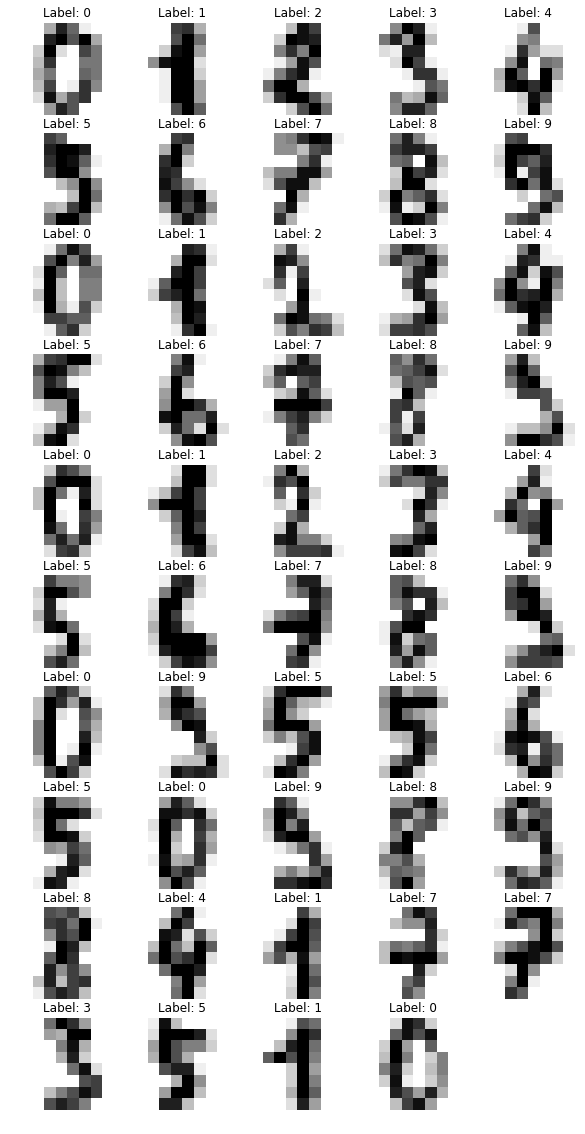

In [6]:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(digits.images[i], cmap="gray_r")
    plt.title('Label: %i' % digits.target[i])

On peut "aplatir" le tableau en une dimension avec *reshape* :

In [7]:
vect=digits.images[0].reshape(64)
print(vect)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
vect.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

On transforme de cette manière tout le dataset :

In [9]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

On met à l'échelle :

In [10]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [11]:
y = digits.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

On teste une régression logistique :

In [13]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

cm = confusion_matrix(y_test, y_lr)
print(cm)
lr_score = accuracy_score(y_test, y_lr)
print(lr_score)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  2  0  0 26  1]
 [ 0  0  0  0  0  1  0  0  1 32]]
0.9722222222222222


Avec un réseaux de neurones, première couche de 100 neurones, et seconde de 50 :

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,64))
mlp.fit(X_train,y_train)
y_mlp = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_mlp)
print(cm)
mlp_score = accuracy_score(y_test, y_mlp)
print(mlp_score)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]
0.9805555555555555


Le dataset a été constitué par Zalando :  
https://github.com/zalandoresearch/fashion-mnist

In [15]:
df = pd.read_csv('fashion-mnist_train.csv')

In [16]:
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0        30        43   
3       0    ...            3         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         1         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [17]:
X_train = df.drop(['label'], axis=1)
y_train = df.label

In [18]:
images = np.array(X_train)

In [19]:
print(images[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0
   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115  62
 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0   0
   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254  45
   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225 217
 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1   0
   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213 226
 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210 212
 213 206 214 213 214 213 210 215 214 206 199 218 25

In [20]:
img = images[0].reshape(28,28)

In [21]:
labels=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
       'Sneaker','Bag','Ankle boot']

Text(0.5,1,'Label: Pullover')

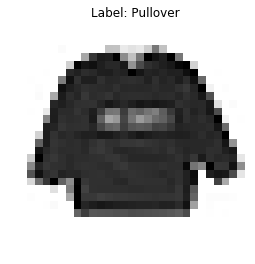

In [22]:
plt.imshow(img, cmap="gray_r")
plt.axis('off')
plt.title('Label: %s' % labels[y_train[0]])